### Svar på uppgifter i Exercises-01 Missing data and aggregations exercises

***Uppgift 1 - Findmissing values***

In [585]:
import pandas as pd

path = "../Data/student-mat-missing-data.csv"

data = pd.read_csv(path)

print(data.isna().sum())


Unnamed: 0     0
school         0
sex            0
age           14
address        5
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         5
freetime      16
goout          5
Dalc           0
Walc           0
health         5
absences       5
G1             0
G2             0
G3             0
dtype: int64


In [586]:
def plot_missing_values(data):
    import plotly_express as px

    data_null = pd.DataFrame({"NaN count": data.isna().sum()})
    print(data_null)
    data_null = data_null[data_null["NaN count"] != 0].sort_values(by= "NaN count", ascending=False)
    fig = px.bar(data_null, x = data_null.index, y = "NaN count", labels = {"index": "Columns"})

    return fig.show()
        

In [587]:
import Tools.data_utils as du

plot_null = du.plot_missing_values(data)

          NaN count
freetime         16
age              14
address           5
famrel            5
goout             5
health            5
absences          5


In [588]:
data_null_rows = (data["freetime"].isna())
data_null_rows = list(data_null_rows[data_null_rows == True].index)
print(f"This indexes has a Nan: {data_null_rows}")

This indexes has a Nan: [87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


In [589]:
data_null_rows2 = list(data[(data["freetime"].isnull()) | data["age"].isnull()].index)

print(f"Rows of age or freetime with a Nan values: {data_null_rows2}")

Rows of age or freetime with a Nan values: [20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


In [590]:
two_NaN = data.isnull().sum(axis=1)
print(two_NaN)
two_NaN = two_NaN[two_NaN > 1]
total_Nan = len(two_NaN) / len(data)

print(total_Nan)

0      0
1      0
2      0
3      0
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Length: 395, dtype: int64
0.012658227848101266


***Uppgift 2 - Clean Data***

In [591]:
print(data)
null_index = data.dropna()
print(null_index)


     Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu  \
0             0     GP   F  18.0       U     GT3       A     4     4   
1             1     GP   F  17.0       U     GT3       T     1     1   
2             2     GP   F  15.0       U     LE3       T     1     1   
3             3     GP   F  15.0       U     GT3       T     4     2   
4             4     GP   F  16.0       U     GT3       T     3     3   
..          ...    ...  ..   ...     ...     ...     ...   ...   ...   
390         390     MS   M  20.0       U     LE3       A     2     2   
391         391     MS   M  17.0       U     LE3       T     3     1   
392         392     MS   M  21.0       R     GT3       T     1     1   
393         393     MS   M  18.0       R     LE3       T     3     2   
394         394     MS   M  19.0       U     LE3       T     1     1   

         Mjob  ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  \
0     at_home  ...    4.0      3.0   4.0     1     1  

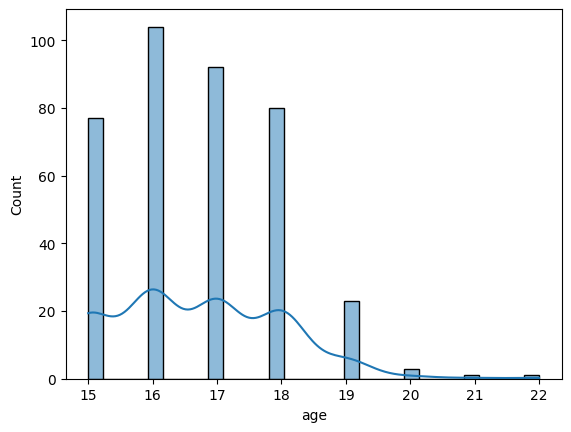

In [592]:
import seaborn as sns
fig3 = sns.histplot(data["age"], bins=30, kde= True)



     Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu  \
0             0     GP   F  18.0       U     GT3       A     4     4   
1             1     GP   F  17.0       U     GT3       T     1     1   
2             2     GP   F  15.0       U     LE3       T     1     1   
3             3     GP   F  15.0       U     GT3       T     4     2   
4             4     GP   F  16.0       U     GT3       T     3     3   
..          ...    ...  ..   ...     ...     ...     ...   ...   ...   
390         390     MS   M  20.0       U     LE3       A     2     2   
391         391     MS   M  17.0       U     LE3       T     3     1   
392         392     MS   M  21.0       R     GT3       T     1     1   
393         393     MS   M  18.0       R     LE3       T     3     2   
394         394     MS   M  19.0       U     LE3       T     1     1   

         Mjob  ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  \
0     at_home  ...    4.0      3.0   4.0     1     1  

Text(0.5, 1.0, 'Ages that has not a Higher')

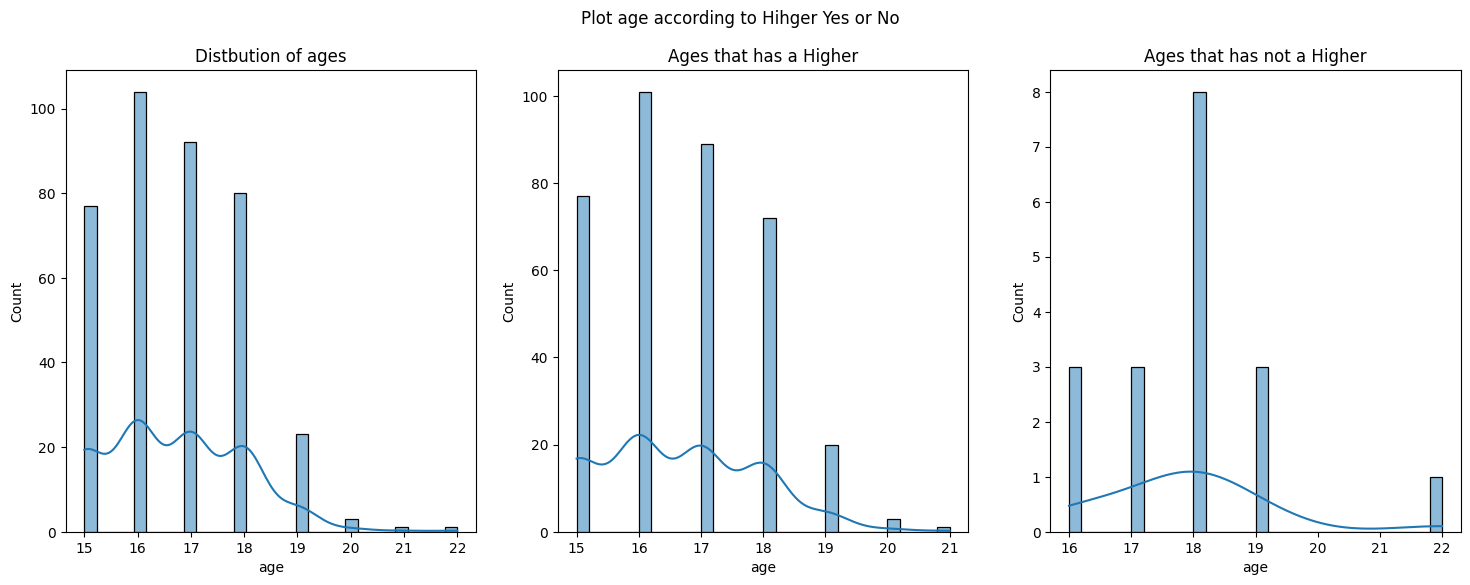

In [593]:
import matplotlib.pyplot as plt

filter_higher_y = data[data["higher"] == "yes"]
filter_higher_n = data[data["higher"] == "no"]
print(filter_higher_y)
print(filter_higher_n)

fig, ax = plt.subplots(1,3 , figsize = (18, 6))
fig.suptitle("Plot age according to Hihger Yes or No")
sns.histplot(data["age"], bins= 30, kde=True, ax=ax[0])
ax[0].set_title("Distbution of ages")
sns.histplot(filter_higher_y, x= "age", bins=30, kde=True, ax=ax[1])
ax[1].set_title("Ages that has a Higher")
sns.histplot(filter_higher_n, x= "age", bins=30, kde=True, ax=ax[2])
ax[2].set_title("Ages that has not a Higher")

In [594]:
data["Alcohol"] = data["Dalc"] + data["Walc"]

data["Alcohol"]

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 395, dtype: int64

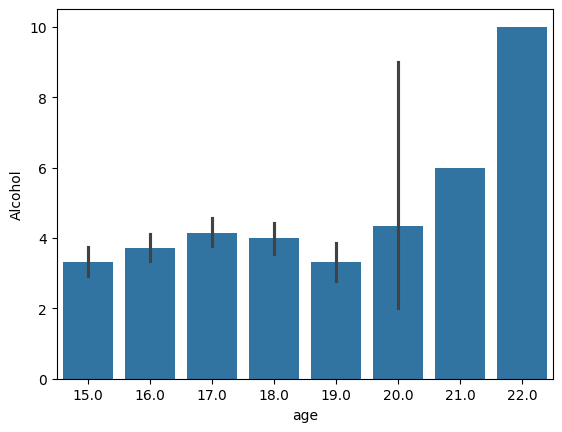

In [595]:
alc_age = sns.barplot(data, x="age", y="Alcohol")

In [596]:
index_age_Nan = data[data["age"].isna()].index
for row in index_age_Nan:
      if data.loc[row, "Alcohol"] >= 4:
        data.loc[row, "age"] = 17
      if data.loc[row, "Alcohol"] < 4:
        data.loc[row, "age"] = 15

print(data.loc[index_age_Nan, ["Alcohol", "age"]])


      

     Alcohol   age
20         2  15.0
71         2  15.0
102        2  15.0
106        2  15.0
121        3  15.0
160        4  17.0
188        4  17.0
191        2  15.0
214        3  15.0
270        6  17.0
276        2  15.0
293        2  15.0
348        4  17.0
385        4  17.0


In [632]:
freetime_nan = data[data["freetime"].isna()].index

#print(data.loc[freetime_nan, ["higher", "freetime","age"]])

print(data.columns)

print(data[["higher", "freetime"]].value_counts())


Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'Alcohol'],
      dtype='object')
higher  freetime
yes     3.0         141
        4.0         108
        2.0          62
        5.0          33
        1.0          17
no      3.0           8
        4.0           5
        5.0           4
        2.0           1
Name: count, dtype: int64
